# Mostrar imagenes de Reconocimiento de Expresiones Faciales

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def getData(balance_ones=True):
    # images are 48x48 = 2304 size vectors
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open('/home/jorge/data/facial_expressions/fer2013/fer2013.csv'):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)

    if balance_ones:
        # balance the 1 class
        X0, Y0 = X[Y!=1, :], Y[Y!=1]
        X1 = X[Y==1, :]
        X1 = np.repeat(X1, 9, axis=0)
        X = np.vstack([X0, X1])
        Y = np.concatenate((Y0, [1]*len(X1)))

    return X, Y

In [4]:
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [5]:
X, Y = getData(balance_ones=False)

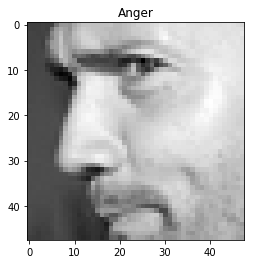

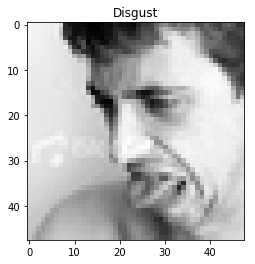

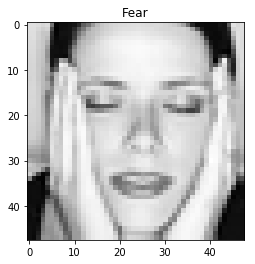

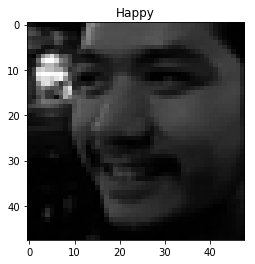

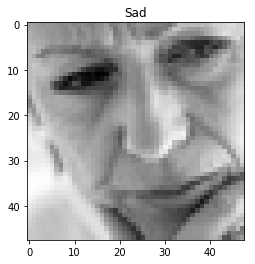

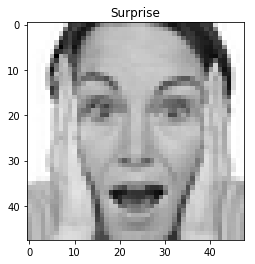

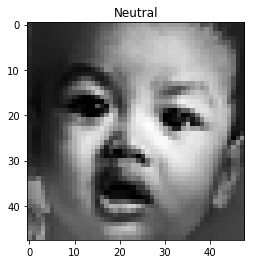

In [6]:
for i in range(7):
    x, y = X[Y==i], Y[Y==i]
    N = len(y)
    j = np.random.choice(N)
    plt.imshow(x[j].reshape(48, 48), cmap='gray')
    plt.title(label_map[y[j]])
    plt.show()